In [1]:
import os
os.getcwd()

'C:\\Users\\easyy\\Py_try'

In [2]:
# 함수( 인수 ) VS 객체.메소드( 파라미터 ) 

In [3]:
#특수값; ' 문자형 '으로 처리해야함을 주의!!
#(참고!) True False; 대소문자도 주의!!
#NULL: 자리X, 존재하지 않는 value

#NA: 자리O, 알지 못하는 (결측치)사용불가한 value
#NaN: (수학적으로 정의불가능해)사용불가한 numeric value

In [4]:
#axis(2차원 이상: dataframe..)
#=0: idx_name 살아있는 [열벡터] 단위로 →
#=1: col_name 살아있는 [행벡터] 단위로 ↓

In [5]:
import numpy as np
import pandas as pd

### ▣ Dataframe 생성; dataset형식

##### (1) array

In [6]:
ary=np.array([[1,2,3],[4,5,6]])
ary_df=pd.DataFrame(data=ary,index=range(1,3),columns=['A','B','C'])
print(ary_df)

   A  B  C
1  1  2  3
2  4  5  6


##### (2) dictionary

In [7]:
dict={'A':['1','4'],'B':['2','5'],'C':['3','6']}
dict_df=pd.DataFrame(data=dict)
print(dict_df)

   A  B  C
0  1  2  3
1  4  5  6


##### (3) series: 1개의 열

In [8]:
sis={'UK':'London','India':'New Delhi','US':'Washington'}
sis_df=pd.Series(sis)
print(sis_df)

UK           London
India     New Delhi
US       Washington
dtype: object


##### (4) 외부파일

In [9]:
csv_df=pd.read_csv('auto-mpg.csv',sep=',')
print(csv_df.head(7))

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   
5  15.0          8         429.0        198    4341          10.0          70   
6  14.0          8         454.0        220    4354           9.0          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
5       1           ford galaxie 500  
6       1           chevrolet impala  


### ▣ Dataframe 탐색

In [10]:
csv_df.info() #instance수, column명, 각 자료형, null개수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
print(csv_df.shape) #( index 수 , column 수 )
print(len(csv_df.index)) #index 수
print(len(csv_df.columns)) #column 수

(398, 9)
398
9


In [12]:
print(ary_df.index) #index명
print(ary_df.columns) #column명

RangeIndex(start=1, stop=3, step=1)
Index(['A', 'B', 'C'], dtype='object')


In [13]:
print(type(ary_df)) #자료형

<class 'pandas.core.frame.DataFrame'>


In [14]:
pd.options.display.max_rows=20 #최대 표시 행수
pd.set_option('display.min_rows',5) #최소 표시 행수
print(csv_df.iloc[:,0:5])

      mpg  cylinders  displacement horsepower  weight
0    18.0          8         307.0        130    3504
1    15.0          8         350.0        165    3693
..    ...        ...           ...        ...     ...
396  28.0          4         120.0         79    2625
397  31.0          4         119.0         82    2720

[398 rows x 5 columns]


In [15]:
print(dir(ary_df)[:20]) #변수와 메서드

['A', 'B', 'C', 'T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__']


In [16]:
print(ary_df.T) #전치행렬

   1  2
A  1  4
B  2  5
C  3  6


In [17]:
print(csv_df.count()) #데이터의 개수

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64


#### # 통계; ddof=1: 표본 자유도 반영

In [18]:
# numeric data만 살려놓기
csv_df_numeric=csv_df.drop(['horsepower','car name'],axis=1)
csv_df_numeric.max(axis=0)

mpg               46.6
cylinders          8.0
displacement     455.0
weight          5140.0
acceleration      24.8
model year        82.0
origin             3.0
dtype: float64

In [19]:
#기술통계량 요약
csv_df_numeric.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
#상관계수
csv_df_numeric.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [21]:
#샘플링; 표본의 수, 중복추출, random_state 등을 따로 지정할 수 있다..
csv_df.sample(frac=0.1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
26,10.0,8,307.0,200,4376,15.0,70,1,chevy c20
265,17.5,8,318.0,140,4080,13.7,78,1,dodge magnum xe
...,...,...,...,...,...,...,...,...,...
305,28.4,4,151.0,90,2670,16.0,79,1,buick skylark limited
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340


### ▣ Dataframe 수정

#### (1) 행/열 추가 및 대체: [ idx/col_name(자료형무관) ]

In [22]:
#row: .loc[ idx_name(numeric OR char) ]
#col: [ col_name(numeric OR char) ]
df=pd.DataFrame({'A':['1','4'],'B':['2','5'],'C':['3','6']})
df.loc[2]=[7,8,9]
df[4]=[11,12,13]
df.loc['3']=range(7,11)
print(df)

   A  B  C   4
0  1  2  3  11
1  4  5  6  12
2  7  8  9  13
3  7  8  9  10


In [23]:
# col_name 대체
# .rename( columns = { ' key ' : 'value' } ); 수정본으로 저장X
df.rename(columns={'A':'aaa','B':'bb'})

,aaa,bb,C,4
0,1,2,3,11
1,4,5,6,12
2,7,8,9,13
3,7,8,9,10


In [24]:
# col 추가
# .assign( 새로운 col_name =  ); 주의!! 새로운col_name은 문자형X, 수정본으로 저장X 
print(df.assign(A_plus_B=df['A']+df.B))

   A  B  C   4 A_plus_B
0  1  2  3  11       12
1  4  5  6  12       45
2  7  8  9  13       15
3  7  8  9  10       15


In [25]:
# col 삽입; 삽입되는 행의 오른쪽에 있는 행들 한 칸씩 오른쪽으로 이동~
# .insert( loc= col_abs idx , column = '새로운 col_name' , value =  ); 수정본으로 저장
df.insert(loc=3,column='D',value=11)
print(df)

   A  B  C   D   4
0  1  2  3  11  11
1  4  5  6  11  12
2  7  8  9  11  13
3  7  8  9  11  10


#### # 값 대체; 위치 OR 값 을 특정

In [26]:
# 특정 위치(원소)에 있는 값 대체
#'(4) 슬라이싱'을 참고하면 행/열 모두에 지정가능한 것은 .loc OR .iloc이다. [ ]은 불가!!
df[2,'D']='NA'     #잘못된 에시)) (2,'D') 튜플형으로 인식해 새로운 col추가
df.loc[2,'D']=10  
print(df)

   A  B  C   D   4 (2, D)
0  1  2  3  11  11     NA
1  4  5  6  11  12     NA
2  7  8  9  10  13     NA
3  7  8  9  11  10     NA


In [27]:
# index관련 정보 모를 때... 값 대체
# .replace( { col_name : before_value } , after_value ); 수정본으로 저장X
df.replace({4:13},11)

,A,B,C,D,4,"(2, D)"
0,1,2,3,11,11,NA
1,4,5,6,11,12,NA
2,7,8,9,10,11,NA
3,7,8,9,11,10,NA


In [28]:
# 특정값을 대체
# .replace( before_value , after_value ); 수정본으로 저장X!!
df.replace('NA',100)

,A,B,C,D,4,"(2, D)"
0,1,2,3,11,11,100
1,4,5,6,11,12,100
2,7,8,9,10,13,100
3,7,8,9,11,10,100


#### (2) 행/열 삭제; axis∝[차원]안쪽으로, inplace: 삭제본으로 저장

In [29]:
print(df.columns)
print(df.index)

Index(['A', 'B', 'C', 'D', 4, (2, 'D')], dtype='object')
Index([0, 1, 2, '3'], dtype='object')


In [30]:
df.drop(['D',(2,'D')],axis=1,inplace=True)
df.drop([2,'3'],axis=0,inplace=True)
print(df)

   A  B  C   4
0  1  2  3  11
1  4  5  6  12


#### (3) 인덱싱; 기준 행/열 개수 ⇒ 반환자료형: Series(無col) OR DataFrame(多)

In [31]:
#col_인덱싱: [ 'col_name' ]
print(csv_df[['mpg','weight']])
type(csv_df[['mpg','weight']])

      mpg  weight
0    18.0    3504
1    15.0    3693
..    ...     ...
396  28.0    2625
397  31.0    2720

[398 rows x 2 columns]


pandas.core.frame.DataFrame

In [32]:
print(csv_df['mpg'])
type(csv_df['mpg'])

0      18.0
1      15.0
       ... 
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


pandas.core.series.Series

In [33]:
#col_(only1)지정: .col_name
print(csv_df.mpg)
type(csv_df.mpg)

0      18.0
1      15.0
       ... 
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


pandas.core.series.Series

In [34]:
#col_인덱싱: .iloc[ : , col_abs idx(슬라이싱) ]
print(csv_df.iloc[:,0])

0      18.0
1      15.0
       ... 
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


In [35]:
#row_인덱싱: .loc[ 'idx_name' ]
print(ary_df.loc[1])
type(ary_df.loc[1])

A    1
B    2
C    3
Name: 1, dtype: int32


pandas.core.series.Series

In [36]:
print(ary_df.loc[[1,2]])
type(ary_df.loc[[1,2]])

   A  B  C
1  1  2  3
2  4  5  6


pandas.core.frame.DataFrame

In [37]:
#row_인덱싱: .iloc[ row_abs idx ]
print(ary_df.iloc[0])

A    1
B    2
C    3
Name: 1, dtype: int32


#### (4) 슬라이싱: 화살표 방향대로 탐색; row(→) col(↓)
 :[ row' (, col') ] ; [ ] OR .loc OR .iloc

In [38]:
# [ col_bool_condition ] = col조건 만족하는 row(객체)가 나옴
#.loc[ row/col_name ]; start : end(얘만 다름 주의!!)
#.iloc[ row/col_abs idx ]; start : except_start
#(참고하되 권장X!) [ row_abs idx ]; start : except_start

In [39]:
#range( start , except_start , step )
list(range(3,10,3))

[3, 6, 9]

In [40]:
#list_슬라이싱: [ start : except_start ]
list(range(3,10,3))[:2]

[3, 6]

In [41]:
#슬라이싱 [ ] 안에서 col에 대해 생략가능!!
print(ary_df.loc[1:2])

   A  B  C
1  1  2  3
2  4  5  6


In [42]:
print(ary_df.iloc[1:2])

   A  B  C
2  4  5  6


In [43]:
print(ary_df[1:2])

   A  B  C
2  4  5  6


In [44]:
#슬라이싱 [ ] 안에서 row에 대해 먼저 지정해줘야!!
print(csv_df.loc[:,'mpg':'weight'])

      mpg  cylinders  displacement horsepower  weight
0    18.0          8         307.0        130    3504
1    15.0          8         350.0        165    3693
..    ...        ...           ...        ...     ...
396  28.0          4         120.0         79    2625
397  31.0          4         119.0         82    2720

[398 rows x 5 columns]


In [45]:
print(ary_df.iloc[:,:2])

   A  B
1  1  2
2  4  5


In [46]:
#.loc[ col_bool_condition , 인덱싱 OR 슬라이싱 ]
df = pd.DataFrame({'A':[11,21,31], 'B':[12,22,32], 'C':[13,23,33]}, index=['1st','2nd','3rd'])
print(df[df.C<30])

      A   B   C
1st  11  12  13
2nd  21  22  23


In [47]:
print(df.loc[lambda x: x.C<30])

      A   B   C
1st  11  12  13
2nd  21  22  23


In [48]:
print(csv_df.loc[csv_df['mpg']>30, 'cylinders':'weight'])

     cylinders  displacement horsepower  weight
53           4          71.0         65    1773
54           4          72.0         69    1613
..         ...           ...        ...     ...
395          4         135.0         84    2295
397          4         119.0         82    2720

[85 rows x 4 columns]


#### # Filter; col/row_name을 문자열로 접근해 추출, default:axis=1

In [49]:
df = pd.DataFrame({'abc':[1,4,7], 'bcd':[2,5,8], 'abd':[3,6,9]}, index=['1st','2nd','3rd'])
print(df)

     abc  bcd  abd
1st    1    2    3
2nd    4    5    6
3rd    7    8    9


In [50]:
# 동일한 이름의 특정 열/행; items= [ 'col/row_name' ]
print(df.filter(items=['bcd','abd']))

     bcd  abd
1st    2    3
2nd    5    6
3rd    8    9


In [51]:
# 해당 글자에 대한 정규표현식: regex= '  ^ [] $  '
print(df.filter(regex='^a')) #'a'로 시작하는 문자열을 가진 col추출

     abc  abd
1st    1    3
2nd    4    6
3rd    7    9


In [52]:
print(df.filter(regex='[bc]')) #'b'또는'c'가 포함되어 있는 문자열을 가진 col추출

     abc  bcd  abd
1st    1    2    3
2nd    4    5    6
3rd    7    8    9


In [53]:
print(df.filter(regex='d$',axis=0)) #'d'로 끝나는 문자열을 가진 row추출

     abc  bcd  abd
2nd    4    5    6
3rd    7    8    9


In [54]:
# 해당 문자열이 포함되어있는 열/행: like= ' 특정 문자열 '
print(df.filter(like='ab')) #'ab'가 포함되어 있는 문자열을 가진 col추출

     abc  abd
1st    1    3
2nd    4    6
3rd    7    9


#### # Query; col_name을 포함한 bool_condition을 문자열로 접근해 추출

In [55]:
df.query('abc > 3') #속도가 느리지만..

,abc,bcd,abd
2nd,4,5,6
3rd,7,8,9


In [56]:
abc_max=df.max()['abc'] 
df.query('abd < @abc_max') #외부 값을 @로 참조가능하다!!

,abc,bcd,abd
1st,1,2,3
2nd,4,5,6


#### (5) 연산; 연산자 OR 메소드

In [57]:
df1 = pd.DataFrame({'A':[11,21,31], 'B':[12,22,32], 'C':[13,23,33]}, index=['1st','2nd','3rd'])
df2 = pd.DataFrame({'A':[11,21,41], 'B':[12,22,42], 'E':[14,24,44]}, index=['1st','2nd','4th'])
print(df1,end='\n'*2)
print(df2)

      A   B   C
1st  11  12  13
2nd  21  22  23
3rd  31  32  33

      A   B   E
1st  11  12  14
2nd  21  22  24
4th  41  42  44


In [58]:
# 연산자: DataFrame의 shape은 합집합, 행/열이 모두 같은 원소끼리만 연산, 빈 곳은 NaN
print(df1+df2)

        A     B   C   E
1st  22.0  24.0 NaN NaN
2nd  42.0  44.0 NaN NaN
3rd   NaN   NaN NaN NaN
4th   NaN   NaN NaN NaN


In [59]:
# 메소드: DataFrame 자체를 합집합, 빈 곳은 NaN
# fill_value= (교집합이 아닌 곳에서의) NULL를 대체할 값
print(df1.add(df2, fill_value=0))

        A     B     C     E
1st  22.0  24.0  13.0  14.0
2nd  42.0  44.0  23.0  24.0
3rd  31.0  32.0  33.0   NaN
4th  41.0  42.0   NaN  44.0


In [60]:
print(df1.mul(df2, fill_value=1))

         A      B     C     E
1st  121.0  144.0  13.0  14.0
2nd  441.0  484.0  23.0  24.0
3rd   31.0   32.0  33.0   NaN
4th   41.0   42.0   NaN  44.0


#### (6) 정렬; 값 OR abs_idx 으로

In [61]:
df = pd.DataFrame({'A':[11,21,31], 'B':[12,22,32], 'C':[33,32,31]}, index=['1st','2nd','3rd'])
print(df)

      A   B   C
1st  11  12  33
2nd  21  22  32
3rd  31  32  31


In [62]:
df.sort_values(by='A', ascending=False)

,A,B,C
3rd,31,32,31
2nd,21,22,32
1st,11,12,33


In [63]:
df.sort_index()

,A,B,C
1st,11,12,33
2nd,21,22,32
3rd,31,32,31


In [64]:
df.rank(axis=0, ascending=False)

,A,B,C
1st,3.0,3.0,1.0
2nd,2.0,2.0,2.0
3rd,1.0,1.0,3.0


#### # apply

In [65]:
df = pd.DataFrame({'scale':['small','large','small','large'], 'location':['east','east','south','south'], 'sales':[10,20,30,40]})
print(df)

   scale location  sales
0  small     east     10
1  large     east     20
2  small    south     30
3  large    south     40


In [66]:
print(df.sales.apply(lambda x: x**2))

0     100
1     400
2     900
3    1600
Name: sales, dtype: int64


In [67]:
# VS map
print(list(map(lambda x: x**2, df.sales)))

[100, 400, 900, 1600]


#### # groupby; 범주형value를 가지는 col를 기준으로 그룹화(+Series로 변환됨)

In [68]:
df = pd.DataFrame({'scale':['small','large','small','large'], 'location':['east','east','south','south'], 'sales':[10,20,30,40]})
print(df)

   scale location  sales
0  small     east     10
1  large     east     20
2  small    south     30
3  large    south     40


In [69]:
dfgb1 = df.groupby(by='scale')['sales'].sum()
print(dfgb1, end='\n'*2)
print(type(dfgb1),end='\n'*2)
print(dfgb1.index,end='\n'*2)
print(dfgb1.values)

scale
large    60
small    40
Name: sales, dtype: int64

<class 'pandas.core.series.Series'>

Index(['large', 'small'], dtype='object', name='scale')

[60 40]


In [70]:
dfgb2 = df.groupby(by=['location', 'scale'])['sales'].mean()
print(dfgb2, end='\n'*2)
print(type(dfgb2),end='\n'*2)
print(dfgb2.index, end='\n'*2) #기준col이 2개이상 ⇒ multiindex
print(dfgb2.values)

location  scale
east      large    20.0
          small    10.0
south     large    40.0
          small    30.0
Name: sales, dtype: float64

<class 'pandas.core.series.Series'>

MultiIndex([( 'east', 'large'),
            ( 'east', 'small'),
            ('south', 'large'),
            ('south', 'small')],
           names=['location', 'scale'])

[20. 10. 40. 30.]


#### (7) 재구조화; pd.melt, pd.concat, pd.merge..

In [71]:
df=pd.DataFrame({'Name':['John','Kate','Eric','Mike'],'Height':[160,155,170,180],'Weight':[55,47,63,70]})
print(df)

   Name  Height  Weight
0  John     160      55
1  Kate     155      47
2  Eric     170      63
3  Mike     180      70


#### # melt; column중심에서 value중심으로 변화

In [72]:
#pd.melt( id_vars= 기준column , value_vars= 중심column_default:기준column여집합 
#, var_name= 변화 후 value_vars의 이름 , value_name= 변화 후 value들의 이름
#, col_level= multiindex인 경우에 지정해줘야!!_기준column과 중심column의 level이 동일해야!! )
df_melted=pd.melt(df, id_vars='Name', value_vars=['Height','Weight'], var_name='indicator', value_name='measurements')
df_melted

,Name,indicator,measurements
0,John,Height,160
1,Kate,Height,155
2,Eric,Height,170
3,Mike,Height,180
4,John,Weight,55
5,Kate,Weight,47
6,Eric,Weight,63
7,Mike,Weight,70


In [73]:
df1 = pd.DataFrame({'id':['1st','2nd','3rd'], 'name': ['홍길동', '임꺽정', '김홍익']})
df2 = pd.DataFrame({'id':['2nd','3rd','4th'], 'address': ['서울', '강원도', '경기도']})
print(df1,end='\n'*2)
print(df2)

    id name
0  1st  홍길동
1  2nd  임꺽정
2  3rd  김홍익

    id address
0  2nd      서울
1  3rd     강원도
2  4th     경기도


#### # concat; 교집합은 상관쓰지 말고, 그대로 붙이기(axis주의!!)

In [74]:
concat_row = pd.concat([df1,df2], axis = 0)
concat_col = pd.concat([df1,df2], axis = 1)

print('행으로 합침: \n', concat_row,end='\n'*2)
print('열로 합침: \n', concat_col)

행으로 합침: 
     id name address
0  1st  홍길동     NaN
1  2nd  임꺽정     NaN
2  3rd  김홍익     NaN
0  2nd  NaN      서울
1  3rd  NaN     강원도
2  4th  NaN     경기도

열로 합침: 
     id name   id address
0  1st  홍길동  2nd      서울
1  2nd  임꺽정  3rd     강원도
2  3rd  김홍익  4th     경기도


#### # merge; on= '기준col_name' , how=교집합, 합집합...

In [75]:
# on= ' 공통으로 가지고 있어 기준(식별)col_name '
inner_join = pd.merge(df1, df2, on='id', how='inner') # 기준col_value 으로 교집합
outer_join = pd.merge(df1, df2, on='id', how='outer') # 기준col_value 으로 합집합
print('inner: \n', inner_join,end='\n'*2)
print('outer: \n', outer_join)

inner: 
     id name address
0  2nd  임꺽정      서울
1  3rd  김홍익     강원도

outer: 
     id name address
0  1st  홍길동     NaN
1  2nd  임꺽정      서울
2  3rd  김홍익     강원도
3  4th  NaN     경기도


In [76]:
left_join = pd.merge(df1, df2, on='id', how='left') # 기준col_value 으로 합집합의 왼쪽part만
right_join = pd.merge(df1, df2, on='id', how='right') # 기준col_value 으로 합집합의 오른쪽part만
print('left: \n', left_join, end='\n'*2)
print('right: \n', right_join)

left: 
     id name address
0  1st  홍길동     NaN
1  2nd  임꺽정      서울
2  3rd  김홍익     강원도

right: 
     id name address
0  2nd  임꺽정      서울
1  3rd  김홍익     강원도
2  4th  NaN     경기도


### ▣ Dataframe 정제; 중복되는 개체 및 결측치(NA, NaN), 수정본 저장X

In [77]:
df = pd.DataFrame({'A':[11,21,31,None,31], 'B':[12,22,32,42,32], 'C':[13,None,33,43,33]}
                  , index=['1st','2nd','3rd','4th','7th'])
print(df)

        A   B     C
1st  11.0  12  13.0
2nd  21.0  22   NaN
3rd  31.0  32  33.0
4th   NaN  42  43.0
7th  31.0  32  33.0


In [78]:
#중복데이터(=row) 제거
df.drop_duplicates()

,A,B,C
1st,11.0,12,13.0
2nd,21.0,22,NaN
3rd,31.0,32,33.0
4th,NaN,42,43.0


In [79]:
#결측치(NA) 제거
df.dropna() #row_name이 살아있는 열벡터 기준으로, NA가 있는 row제거

,A,B,C
1st,11.0,12,13.0
3rd,31.0,32,33.0
7th,31.0,32,33.0


In [80]:
df.dropna(axis=1) #col_name이 살아있는 행벡터 기준으로, NA가 있는 col제거

,B
1st,12
2nd,22
3rd,32
4th,42
7th,32


In [81]:
#결측치 대체
#'ffill': 앞 행/열의 값으로 대체
print(df.fillna(axis=0,method='ffill'), end='\n'*2)
#'bfill': 뒤 행/열의 값으로 대체
print(df.fillna(axis=1,method='bfill'))

        A   B     C
1st  11.0  12  13.0
2nd  21.0  22  13.0
3rd  31.0  32  33.0
4th  31.0  42  43.0
7th  31.0  32  33.0

        A     B     C
1st  11.0  12.0  13.0
2nd  21.0  22.0   NaN
3rd  31.0  32.0  33.0
4th  42.0  42.0  43.0
7th  31.0  32.0  33.0


In [82]:
df.fillna(df.mean()) #해당 열의 평균 값으로 대체

,A,B,C
1st,11.0,12,13.0
2nd,21.0,22,30.5
3rd,31.0,32,33.0
4th,23.5,42,43.0
7th,31.0,32,33.0


### ▣ Dataframe 다루기

In [83]:
df = pd.DataFrame({'name':['Kim','Lee','Park','Kim','Lee','Kim']
                   , 'sex':['M','F','F','M','F','M']
                   , 'age':[20,25,30,20,25,20]
                   , 'class':['DS','DS','DS','PP','PP','DV']})
print(df)

   name sex  age class
0   Kim   M   20    DS
1   Lee   F   25    DS
2  Park   F   30    DS
3   Kim   M   20    PP
4   Lee   F   25    PP
5   Kim   M   20    DV


In [84]:
#class별 수강생 수
df.groupby(by='class').name.count()

class
DS    3
DV    1
PP    2
Name: name, dtype: int64

In [85]:
#학생별 수강과목 수
df.groupby(by=list(df.columns[:3]))['class'].count()

name  sex  age
Kim   M    20     3
Lee   F    25     2
Park  F    30     1
Name: class, dtype: int64

In [86]:
#학생별 수강과목이 2개이상
df0=pd.DataFrame(df.groupby(by=list(df.columns[:3]))['class'].count())
df0[df0['class']>1]

,,,class
name,sex,age,
Kim,M,20,3
Lee,F,25,2


In [87]:
#2과목 이상 수강하는 학생 이름
df.groupby(by=list(df.columns[:3])).filter(lambda x: len(x)>1)['name'].unique()

array(['Kim', 'Lee'], dtype=object)

In [88]:
#2과목 이상 수강하는 학생 평균 나이
df.groupby(by=list(df.columns[:3])).filter(lambda x: len(x)>1)[list(df.columns[:3])].drop_duplicates()['age'].mean()

22.5

### ▣ Pandas 시각화; kind= 그래프 종류

In [89]:
df1 = pd.DataFrame(np.random.rand(5)) #난수 5개 만들기
print(df1.head())

df2 = pd.DataFrame(np.random.rand(5)) #난수 5개 만들기
print(df2.head())

          0
0  0.082184
1  0.321684
2  0.134022
3  0.272140
4  0.193817
          0
0  0.761407
1  0.314470
2  0.359672
3  0.930257
4  0.503278


<Axes: >

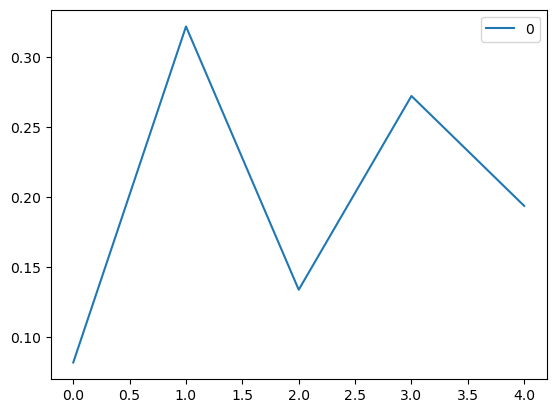

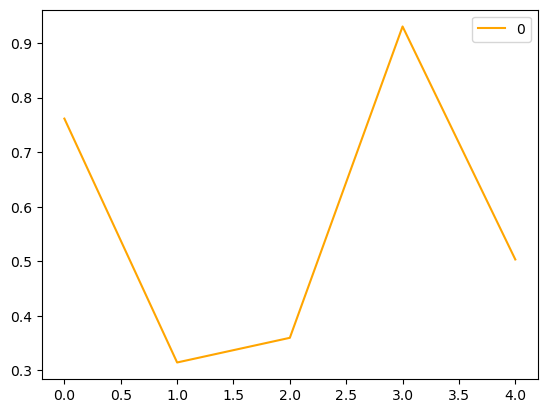

In [90]:
df1.plot(legend='df1')
df2.plot(legend='df2',color='orange')

        df1       df2
0  0.082184  0.761407
1  0.321684  0.314470
2  0.134022  0.359672
3  0.272140  0.930257
4  0.193817  0.503278


<Axes: >

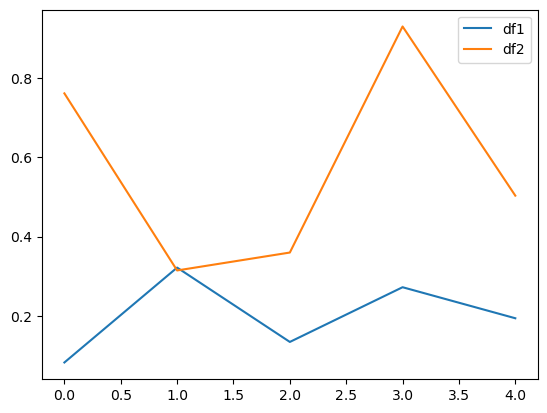

In [91]:
df = pd.concat([df1,df2], axis=1) #행 방향으로 합치기
df.columns = ['df1', 'df2'] #합쳐야 하나에 모든 
print(df.head())
df.plot() #꺽은선 그래프

<Axes: >

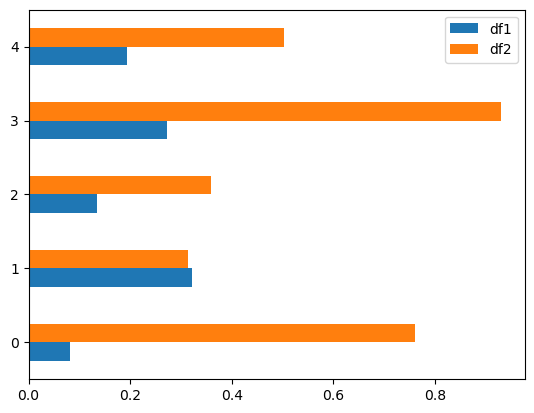

In [92]:
df.plot(kind='barh') #막대 그래프

<Axes: >

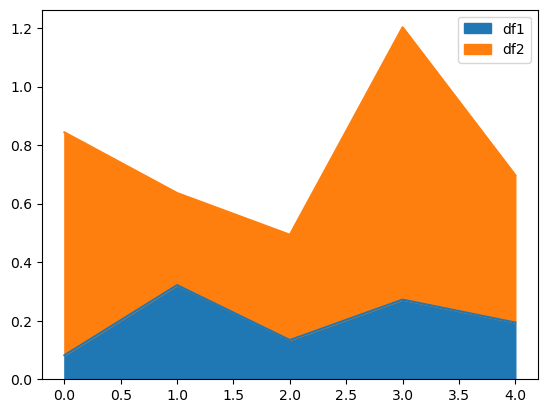

In [93]:
df.plot(kind='area')

<Axes: xlabel='df1', ylabel='df2'>

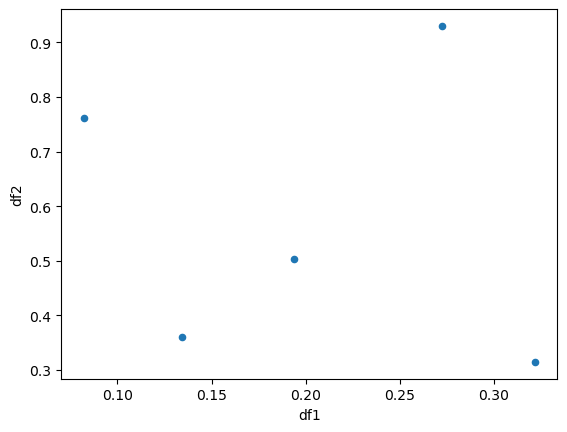

In [94]:
df.plot(kind='scatter', x='df1', y='df2')